**oyo rental prediction**

In [1]:
# importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


**Importing datsets**

In [2]:
rating = pd.read_csv('/content/rating_features.csv')
rental = pd.read_csv('/content/rental_price.csv')

In [3]:
rating.head(5) # prints the first five rows of the rating dataset

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,longitude(East),maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,114.059600,10,1,House,10.0,10.0,10.0,100.0,10.0,Private room
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,...,114.043225,7,0,Camper/RV,NaN,NaN,NaN,NaN,NaN,Private room
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,114.079426,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,114.079035,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,...,114.055590,1125,0,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt


In [4]:
rental.head(5) # prints the first five rows of the rental dataset

,price
0,$300.00
1,$99.00
2,$100.00
3,$100.00
4,$599.00


In [5]:
# Check for number of rows and columns in both datasets 
print(rating.shape)
print(   )
print(rental.shape)

(5834, 25)

(5834, 1)


**Merging the two files**

In [6]:
merged_df = pd.merge(rating, rental, how='outer', left_index=True, right_index=True) 
# how='outer': This argument specifies the type of join to perform. 
# An outer join returns all rows from both DataFrames, filling in missing values with NaN for any cells where data is missing in one of the DataFrames.
# left_index=True, right_index=True: These arguments indicate that the join should be performed using the indices of the two DataFrames. 
# This is necessary because the join columns are not explicitly named in this case, and so the indices are used as the join keys.

In [7]:
merged_df.head(5)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,10,1,House,10.0,10.0,10.0,100.0,10.0,Private room,$300.00
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,...,7,0,Camper/RV,NaN,NaN,NaN,NaN,NaN,Private room,$99.00
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room,$100.00
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room,$100.00
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt,$599.00


In [8]:
merged_df.shape

(5834, 26)

In [9]:
merged_df.dtypes

accommodates                        int64
amenities                          object
availability_30                     int64
bathrooms                         float64
bed_type                           object
bedrooms                          float64
beds                              float64
calculated_host_listings_count      int64
cancellation_policy                object
guests_included                     int64
has_availability                   object
host_is_superhost                  object
host_listings_count               float64
instant_bookable                   object
latitude(North)                   float64
longitude(East)                   float64
maximum_nights                      int64
number_of_reviews                   int64
property_type                      object
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_rating              float64
review_scores_value               

In [10]:
merged_df['price'] = merged_df['price'].str.replace('$', '').str.replace(',', '').astype(float)
merged_df.head(5)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,10,1,House,10.0,10.0,10.0,100.0,10.0,Private room,300.0
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,...,7,0,Camper/RV,NaN,NaN,NaN,NaN,NaN,Private room,99.0
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room,100.0
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room,100.0
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt,599.0


In [11]:
merged_df.dtypes

accommodates                        int64
amenities                          object
availability_30                     int64
bathrooms                         float64
bed_type                           object
bedrooms                          float64
beds                              float64
calculated_host_listings_count      int64
cancellation_policy                object
guests_included                     int64
has_availability                   object
host_is_superhost                  object
host_listings_count               float64
instant_bookable                   object
latitude(North)                   float64
longitude(East)                   float64
maximum_nights                      int64
number_of_reviews                   int64
property_type                      object
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_rating              float64
review_scores_value               

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   accommodates                    5834 non-null   int64  
 1   amenities                       5834 non-null   object 
 2   availability_30                 5834 non-null   int64  
 3   bathrooms                       5788 non-null   float64
 4   bed_type                        5834 non-null   object 
 5   bedrooms                        5828 non-null   float64
 6   beds                            5811 non-null   float64
 7   calculated_host_listings_count  5834 non-null   int64  
 8   cancellation_policy             5834 non-null   object 
 9   guests_included                 5834 non-null   int64  
 10  has_availability                5834 non-null   object 
 11  host_is_superhost               5819 non-null   object 
 12  host_listings_count             58

In [13]:
merged_df.isnull().sum()

accommodates                         0
amenities                            0
availability_30                      0
bathrooms                           46
bed_type                             0
bedrooms                             6
beds                                23
calculated_host_listings_count       0
cancellation_policy                  0
guests_included                      0
has_availability                     0
host_is_superhost                   15
host_listings_count                 15
instant_bookable                     0
latitude(North)                      0
longitude(East)                      0
maximum_nights                       0
number_of_reviews                    0
property_type                        0
review_scores_checkin             2057
review_scores_communication       2057
review_scores_location            2056
review_scores_rating              2046
review_scores_value               2057
room_type                            0
price                    

In [14]:
merged_df = merged_df.dropna()

In [15]:
merged_df.isna().sum()

accommodates                      0
amenities                         0
availability_30                   0
bathrooms                         0
bed_type                          0
bedrooms                          0
beds                              0
calculated_host_listings_count    0
cancellation_policy               0
guests_included                   0
has_availability                  0
host_is_superhost                 0
host_listings_count               0
instant_bookable                  0
latitude(North)                   0
longitude(East)                   0
maximum_nights                    0
number_of_reviews                 0
property_type                     0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_rating              0
review_scores_value               0
room_type                         0
price                             0
dtype: int64

In [16]:
merged_df.shape

(3735, 26)

In [17]:
merged_df.nunique()

accommodates                        16
amenities                         2991
availability_30                     31
bathrooms                           14
bed_type                             5
bedrooms                            10
beds                                16
calculated_host_listings_count      14
cancellation_policy                  5
guests_included                     15
has_availability                     1
host_is_superhost                    2
host_listings_count                 22
instant_bookable                     2
latitude(North)                   3735
longitude(East)                   3733
maximum_nights                      72
number_of_reviews                  160
property_type                       18
review_scores_checkin                7
review_scores_communication          7
review_scores_location               7
review_scores_rating                41
review_scores_value                  8
room_type                            3
price                    

In [18]:
merged_df.duplicated().sum()

0

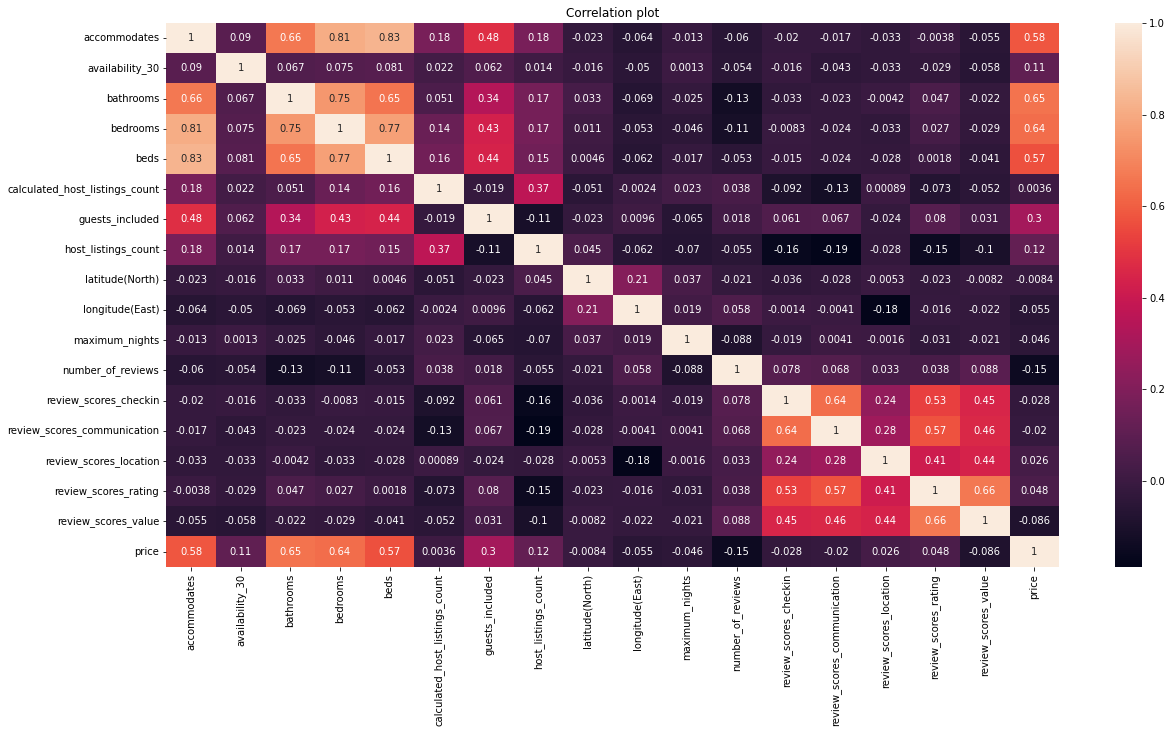

In [19]:
# checking the correlation between the features of the merged_df dataframe by ploting heatmap correlation
corr = merged_df.corr() # finding the correlation of the each columns in the merged_df dataframe, the correlation matrix to be visualized
plt.figure(figsize=(20,10)) # specify the width and height of the plot
corrnplot = sns.heatmap(corr, annot=True,) # create a heatmap plot of a correlation matrix called "corr", with annotations displayed on the plot. "annot=True": enables the display of annotations on the heatmap, showing the correlation values for each pair of variables.
plt.title('Correlation plot') # giving the title to the plot 
plt.show() # display the figure

In [20]:
# sns.pairplot(merged_df)
# sns.pairplot() function takes a DataFrame data as its input and generates a pairplot visualization of all pairwise relationships between the variables in the dataset. 
# By default, the diagonal of the pairplot shows the distribution of each variable, while the lower triangle of the plot shows scatterplots of the pairwise relationships.

**Converting categorical values to numerical values**

In [21]:
merged_df.dtypes

accommodates                        int64
amenities                          object
availability_30                     int64
bathrooms                         float64
bed_type                           object
bedrooms                          float64
beds                              float64
calculated_host_listings_count      int64
cancellation_policy                object
guests_included                     int64
has_availability                   object
host_is_superhost                  object
host_listings_count               float64
instant_bookable                   object
latitude(North)                   float64
longitude(East)                   float64
maximum_nights                      int64
number_of_reviews                   int64
property_type                      object
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_rating              float64
review_scores_value               

In [22]:
merged_df['room_type'].value_counts()

Entire home/apt    2657
Private room       1002
Shared room          76
Name: room_type, dtype: int64

In [23]:
# converting categorical values to numerical values 
merged_df = pd.get_dummies(data=merged_df, columns=['room_type'], drop_first=True)
merged_df.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,price,room_type_Private room,room_type_Shared room
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,1,House,10.0,10.0,10.0,100.0,10.0,300.0,1,0
7,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",16,1.0,Real Bed,1.0,1.0,1,moderate,2,...,2,House,10.0,10.0,10.0,100.0,10.0,40.0,1,0
9,2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",29,1.0,Real Bed,1.0,1.0,1,moderate,2,...,20,House,10.0,10.0,10.0,99.0,10.0,44.0,1,0
11,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",24,1.0,Real Bed,1.0,1.0,1,strict,1,...,9,House,10.0,10.0,10.0,93.0,10.0,50.0,1,0
12,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",25,1.0,Real Bed,1.0,1.0,5,strict,1,...,4,House,10.0,10.0,10.0,100.0,10.0,49.0,1,0


In [24]:
merged_df['instant_bookable'].value_counts()

f    3326
t     409
Name: instant_bookable, dtype: int64

In [25]:
merged_df = pd.get_dummies(data=merged_df, columns=['instant_bookable'], drop_first=True)
merged_df.head(5)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,price,room_type_Private room,room_type_Shared room,instant_bookable_t
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,House,10.0,10.0,10.0,100.0,10.0,300.0,1,0,0
7,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",16,1.0,Real Bed,1.0,1.0,1,moderate,2,...,House,10.0,10.0,10.0,100.0,10.0,40.0,1,0,1
9,2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",29,1.0,Real Bed,1.0,1.0,1,moderate,2,...,House,10.0,10.0,10.0,99.0,10.0,44.0,1,0,0
11,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",24,1.0,Real Bed,1.0,1.0,1,strict,1,...,House,10.0,10.0,10.0,93.0,10.0,50.0,1,0,0
12,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",25,1.0,Real Bed,1.0,1.0,5,strict,1,...,House,10.0,10.0,10.0,100.0,10.0,49.0,1,0,0


In [26]:
merged_df['host_is_superhost'].value_counts()

f    2979
t     756
Name: host_is_superhost, dtype: int64

In [27]:
merged_df = pd.get_dummies(data=merged_df, columns=['host_is_superhost'], drop_first=True)
merged_df.head(5)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,price,room_type_Private room,room_type_Shared room,instant_bookable_t,host_is_superhost_t
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,10.0,10.0,10.0,100.0,10.0,300.0,1,0,0,0
7,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",16,1.0,Real Bed,1.0,1.0,1,moderate,2,...,10.0,10.0,10.0,100.0,10.0,40.0,1,0,1,0
9,2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",29,1.0,Real Bed,1.0,1.0,1,moderate,2,...,10.0,10.0,10.0,99.0,10.0,44.0,1,0,0,1
11,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",24,1.0,Real Bed,1.0,1.0,1,strict,1,...,10.0,10.0,10.0,93.0,10.0,50.0,1,0,0,0
12,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",25,1.0,Real Bed,1.0,1.0,5,strict,1,...,10.0,10.0,10.0,100.0,10.0,49.0,1,0,0,1


In [28]:
merged_df['has_availability'].unique()

array(['t'], dtype=object)

In [29]:
merged_df.drop(['has_availability'], axis=1, inplace=True)

In [30]:
merged_df['property_type'].value_counts()

House              2339
Apartment          1115
Condominium          65
Loft                 60
Other                32
Townhouse            30
Camper/RV            27
Bed & Breakfast      20
Cabin                14
Bungalow             10
Tent                  9
Villa                 5
Treehouse             3
Earth House           2
Boat                  1
Hut                   1
Chalet                1
Tipi                  1
Name: property_type, dtype: int64

In [31]:
# applying label encoder 
from sklearn.preprocessing import LabelEncoder 

propertytype_lable = LabelEncoder() 

merged_df[ 'property_type' ]= propertytype_lable.fit_transform(merged_df[ 'property_type' ])   
print(merged_df[ 'property_type' ].unique())   
merged_df.head(5)

[ 9  1 15  0  4 11 12  7  3  5 17 13  2 10  6  8 14 16]


,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,price,room_type_Private room,room_type_Shared room,instant_bookable_t,host_is_superhost_t
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,10.0,10.0,10.0,100.0,10.0,300.0,1,0,0,0
7,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",16,1.0,Real Bed,1.0,1.0,1,moderate,2,...,10.0,10.0,10.0,100.0,10.0,40.0,1,0,1,0
9,2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",29,1.0,Real Bed,1.0,1.0,1,moderate,2,...,10.0,10.0,10.0,99.0,10.0,44.0,1,0,0,1
11,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",24,1.0,Real Bed,1.0,1.0,1,strict,1,...,10.0,10.0,10.0,93.0,10.0,50.0,1,0,0,0
12,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",25,1.0,Real Bed,1.0,1.0,5,strict,1,...,10.0,10.0,10.0,100.0,10.0,49.0,1,0,0,1


In [32]:
merged_df['cancellation_policy'].value_counts()

strict             1791
moderate            982
flexible            953
super_strict_30       8
no_refunds            1
Name: cancellation_policy, dtype: int64

In [33]:
merged_df = pd.get_dummies(data=merged_df, columns=['cancellation_policy'], drop_first=True)
merged_df.head(5)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,guests_included,host_listings_count,...,review_scores_value,price,room_type_Private room,room_type_Shared room,instant_bookable_t,host_is_superhost_t,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,1,1.0,...,10.0,300.0,1,0,0,0,1,0,0,0
7,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",16,1.0,Real Bed,1.0,1.0,1,2,1.0,...,10.0,40.0,1,0,1,0,1,0,0,0
9,2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",29,1.0,Real Bed,1.0,1.0,1,2,1.0,...,10.0,44.0,1,0,0,1,1,0,0,0
11,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",24,1.0,Real Bed,1.0,1.0,1,1,1.0,...,10.0,50.0,1,0,0,0,0,0,1,0
12,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",25,1.0,Real Bed,1.0,1.0,5,1,9.0,...,10.0,49.0,1,0,0,1,0,0,1,0


In [34]:
merged_df['bed_type'].value_counts()

Real Bed         3604
Futon              54
Airbed             46
Pull-out Sofa      16
Couch              15
Name: bed_type, dtype: int64

In [35]:
bedtype_lable = LabelEncoder() 

merged_df[ 'bed_type' ]= bedtype_lable.fit_transform(merged_df[ 'bed_type' ])   
print(merged_df[ 'bed_type' ].unique())   
merged_df.head(5)

[4 0 3 2 1]


,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,guests_included,host_listings_count,...,review_scores_value,price,room_type_Private room,room_type_Shared room,instant_bookable_t,host_is_superhost_t,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,4,1.0,3.0,1,1,1.0,...,10.0,300.0,1,0,0,0,1,0,0,0
7,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",16,1.0,4,1.0,1.0,1,2,1.0,...,10.0,40.0,1,0,1,0,1,0,0,0
9,2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",29,1.0,4,1.0,1.0,1,2,1.0,...,10.0,44.0,1,0,0,1,1,0,0,0
11,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",24,1.0,4,1.0,1.0,1,1,1.0,...,10.0,50.0,1,0,0,0,0,0,1,0
12,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",25,1.0,4,1.0,1.0,5,1,9.0,...,10.0,49.0,1,0,0,1,0,0,1,0


In [36]:
merged_df['bed_type'].value_counts()

4    3604
2      54
0      46
3      16
1      15
Name: bed_type, dtype: int64

In [37]:
merged_df['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                          35
{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector",Essentials,Shampoo}                                                                                           32
{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo}                                                                       18
{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxi

In [38]:
amenities_lable = LabelEncoder() 

merged_df[ 'amenities' ]= amenities_lable.fit_transform(merged_df[ 'amenities' ])   
print(merged_df[ 'amenities' ].unique())   
merged_df.head(5)

[ 134 2267  838 ... 1740  792 1262]


,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,guests_included,host_listings_count,...,review_scores_value,price,room_type_Private room,room_type_Shared room,instant_bookable_t,host_is_superhost_t,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30
0,6,134,0,2.5,4,1.0,3.0,1,1,1.0,...,10.0,300.0,1,0,0,0,1,0,0,0
7,2,2267,16,1.0,4,1.0,1.0,1,2,1.0,...,10.0,40.0,1,0,1,0,1,0,0,0
9,2,838,29,1.0,4,1.0,1.0,1,2,1.0,...,10.0,44.0,1,0,0,1,1,0,0,0
11,2,2761,24,1.0,4,1.0,1.0,1,1,1.0,...,10.0,50.0,1,0,0,0,0,0,1,0
12,2,1460,25,1.0,4,1.0,1.0,5,1,9.0,...,10.0,49.0,1,0,0,1,0,0,1,0


In [39]:
merged_df.dtypes

accommodates                             int64
amenities                                int64
availability_30                          int64
bathrooms                              float64
bed_type                                 int64
bedrooms                               float64
beds                                   float64
calculated_host_listings_count           int64
guests_included                          int64
host_listings_count                    float64
latitude(North)                        float64
longitude(East)                        float64
maximum_nights                           int64
number_of_reviews                        int64
property_type                            int64
review_scores_checkin                  float64
review_scores_communication            float64
review_scores_location                 float64
review_scores_rating                   float64
review_scores_value                    float64
price                                  float64
room_type_Pri

In [40]:
merged_df.shape

(3735, 29)

**Spliting the dataset to train**

In [41]:
X = merged_df.drop('price', axis=True)
X.head(5)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,guests_included,host_listings_count,...,review_scores_rating,review_scores_value,room_type_Private room,room_type_Shared room,instant_bookable_t,host_is_superhost_t,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30
0,6,134,0,2.5,4,1.0,3.0,1,1,1.0,...,100.0,10.0,1,0,0,0,1,0,0,0
7,2,2267,16,1.0,4,1.0,1.0,1,2,1.0,...,100.0,10.0,1,0,1,0,1,0,0,0
9,2,838,29,1.0,4,1.0,1.0,1,2,1.0,...,99.0,10.0,1,0,0,1,1,0,0,0
11,2,2761,24,1.0,4,1.0,1.0,1,1,1.0,...,93.0,10.0,1,0,0,0,0,0,1,0
12,2,1460,25,1.0,4,1.0,1.0,5,1,9.0,...,100.0,10.0,1,0,0,1,0,0,1,0


In [42]:
Y = merged_df['price']
Y.head(5)

0     300.0
7      40.0
9      44.0
11     50.0
12     49.0
Name: price, dtype: float64

In [43]:
print(X.shape)
print(Y.shape)

(3735, 28)
(3735,)


In [45]:
# splitting into x_train, y_train, x_test, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [46]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2988, 28)
(2988,)
(747, 28)
(747,)


**Model building**

In [47]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [49]:
sk_model.fit(X_train, Y_train)

Lasso()

In [50]:
sk_train_data_prediction = sk_model.predict(X_train)
     

In [51]:
test_data_prediction = sk_model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# R squared error
score_1_ = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2_ = metrics.mean_absolute_error(Y_test, test_data_prediction)


print("R squared error : ", score_1_)
print('Mean Absolute Error : ', score_2_)

R squared error :  0.46252774220423354
Mean Absolute Error :  105.99225049934739
